In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

In [ ]:
pos_for_size = {}
pocket_nums = {}
color_for_queueSize = {2:"red", 3:"blue", 4:"green", 5:"brown", 6:"orange", 7:"gray", 8:"yellow", 9:"C0", 10:"C1", 11:"", 12:"purple"}

In [ ]:
def draw(data, load, xlabel, ylabel, title, filename, legend=[], legend_loc=''):
  position = 1
  pocket_nums[load] = {}
  fig, ax = plt.subplots()
  load_data = data[data['load'] == load]
  uniq_sizes = load_data['size'].unique()
  for size in uniq_sizes:
      pos_for_size[size] = []
      size_data = load_data[load_data['size'] == size]
      uniq_queueSizes = size_data['queueSize'].unique()
      bps = []
      for queueSize in uniq_queueSizes:
          pos_for_size[size].append(position)
          queueSize_data = size_data[size_data['queueSize'] == queueSize]
          pocket_nums[load][(size, queueSize)] = queueSize_data['pocketNum'].unique()[0]
          bp = ax.boxplot(queueSize_data['value'], positions=[position], widths=0.5, 
                  patch_artist=True, notch=True, boxprops=dict(facecolor=color_for_queueSize[queueSize]))
          bps.append(bp['boxes'][0])
          for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
            plt.setp(bp[element], color='black')
          plt.setp(bp['medians'], color = 'black')
          for patch in bp['boxes']:
            patch.set(facecolor=color_for_queueSize[queueSize])
          position += 1
      position += 2

  ax.set_xticklabels([str(i) for i in uniq_sizes])
  ax.set_xticks([(pos_for_size[i][-1] + pos_for_size[i][0]) / 2 for i in uniq_sizes])

  fig.set_figheight(12)
  fig.set_figwidth(18)

  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel, fontsize = 20)
  plt.tick_params(axis='both', which='major', labelsize=15)
  plt.title(title, fontsize = 30) 


  if len(legend):
    ax.legend(bps, legend, loc=legend_loc, fontsize=18)
  fig.savefig('/content/drive/MyDrive/Colab Notebooks/MIPT/graphics/' + filename)
  plt.show()

## Определение максимального количества нод для сбора данных

In [ ]:
data_l_num_nodes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/latencyTestNodes.csv', sep=',', na_values='.')
data_t_num_nodes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/throughputTestNodes.csv', sep=',', na_values='.')

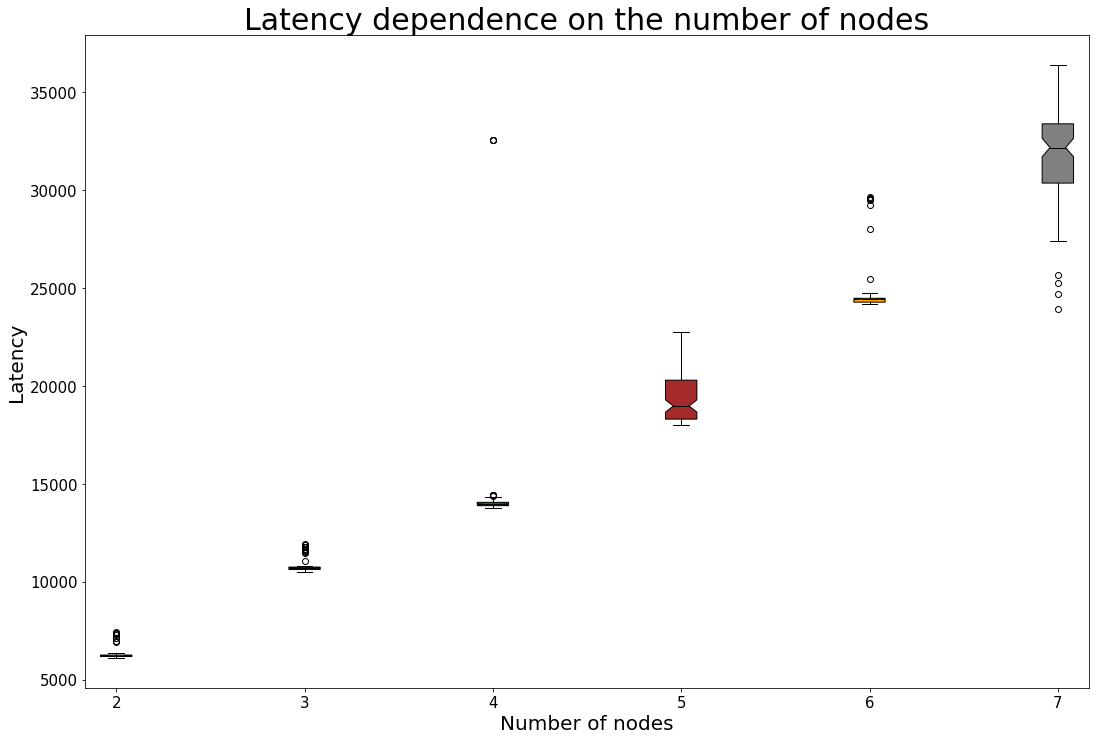

In [ ]:
draw(data_l_num_nodes, 0.2, 'Number of nodes', 'Latency', 'Latency dependence on the number of nodes', 'latencyTestNodes.jpg')

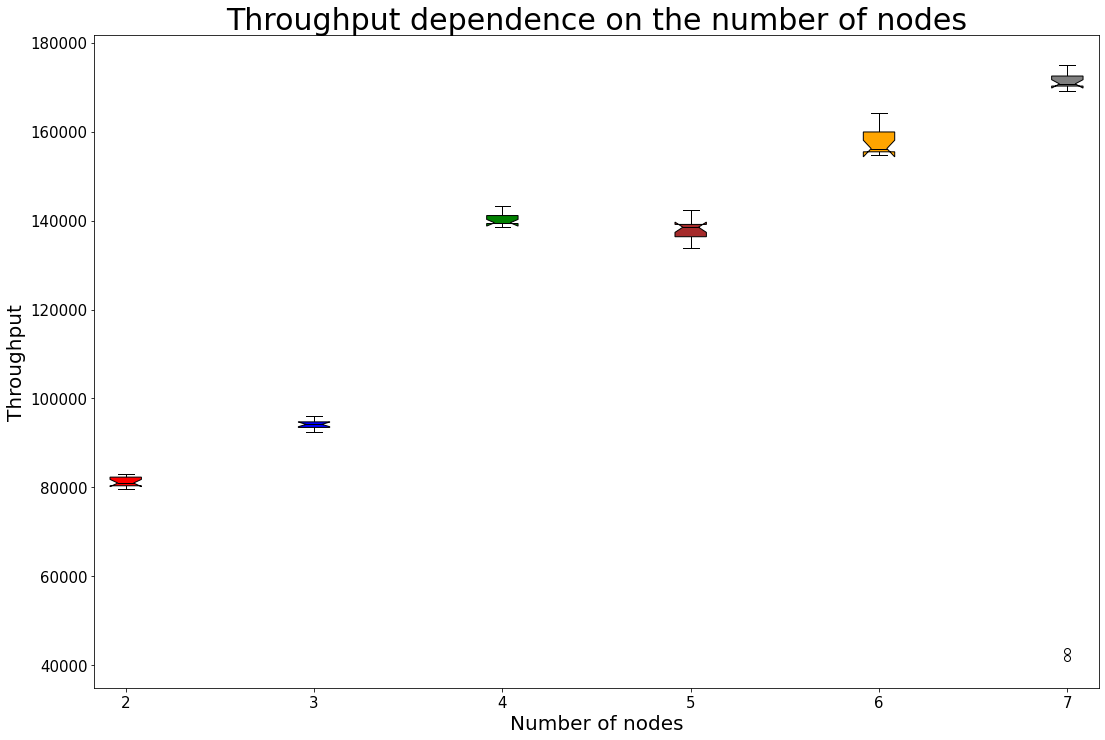

In [ ]:
draw(data_t_num_nodes, 0.2, 'Number of nodes', 'Throughput', 'Throughput dependence on the number of nodes', 'throughputTestNodes.jpg')

## Определение зависимости latency и throughput от размера очереди

In [ ]:
data_l_eq_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/latencyEqPockets.csv', sep=',', na_values='.')
data_t_eq_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/throughputEqPockets.csv', sep=',', na_values='.')

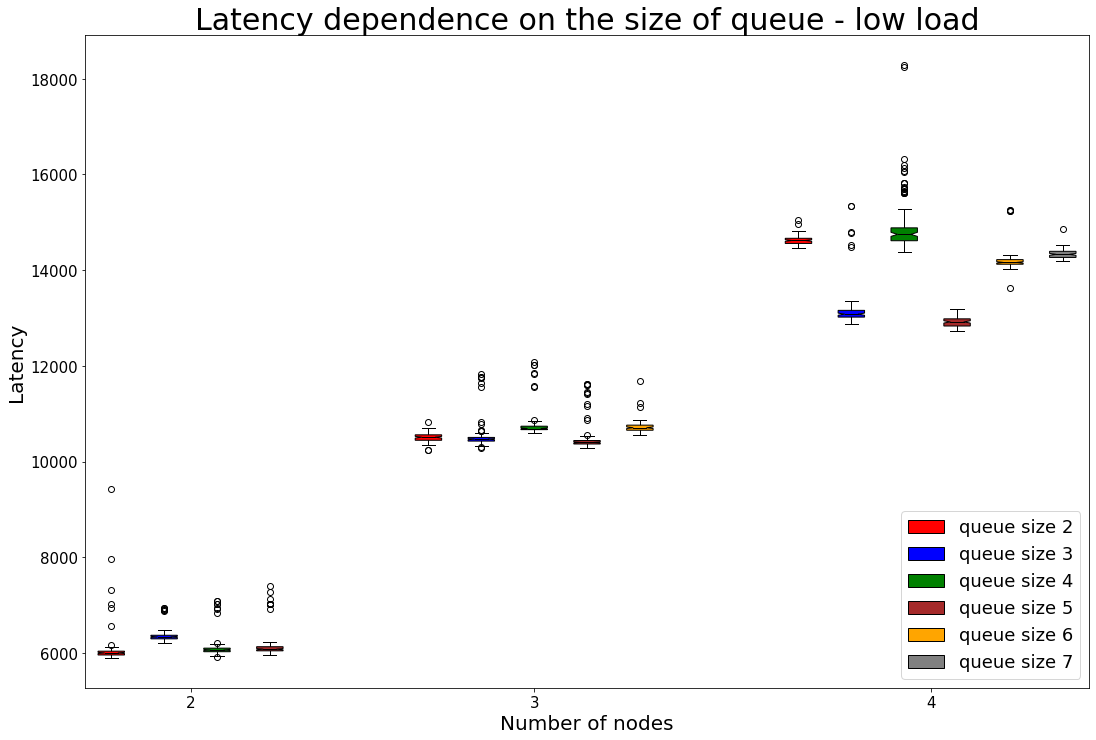

In [ ]:
draw(data_l_eq_pockets, 0.5, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - low load', 'latencyEqPocketsLow.jpg',
     ['queue size 2', 'queue size 3', 'queue size 4', 'queue size 5', 'queue size 6', 'queue size 7'], 'lower right')

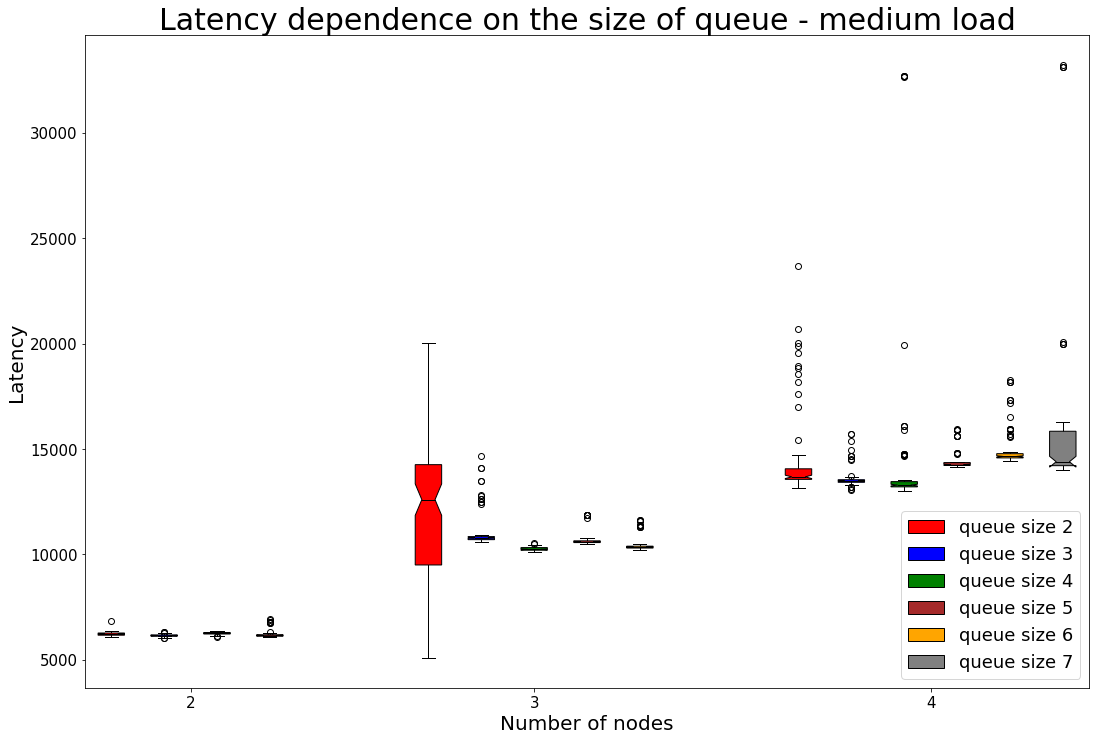

In [ ]:
draw(data_l_eq_pockets, 1, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - medium load', 'latencyEqPocketsMedium.jpg',
     ['queue size 2', 'queue size 3', 'queue size 4', 'queue size 5', 'queue size 6', 'queue size 7'], 'lower right')

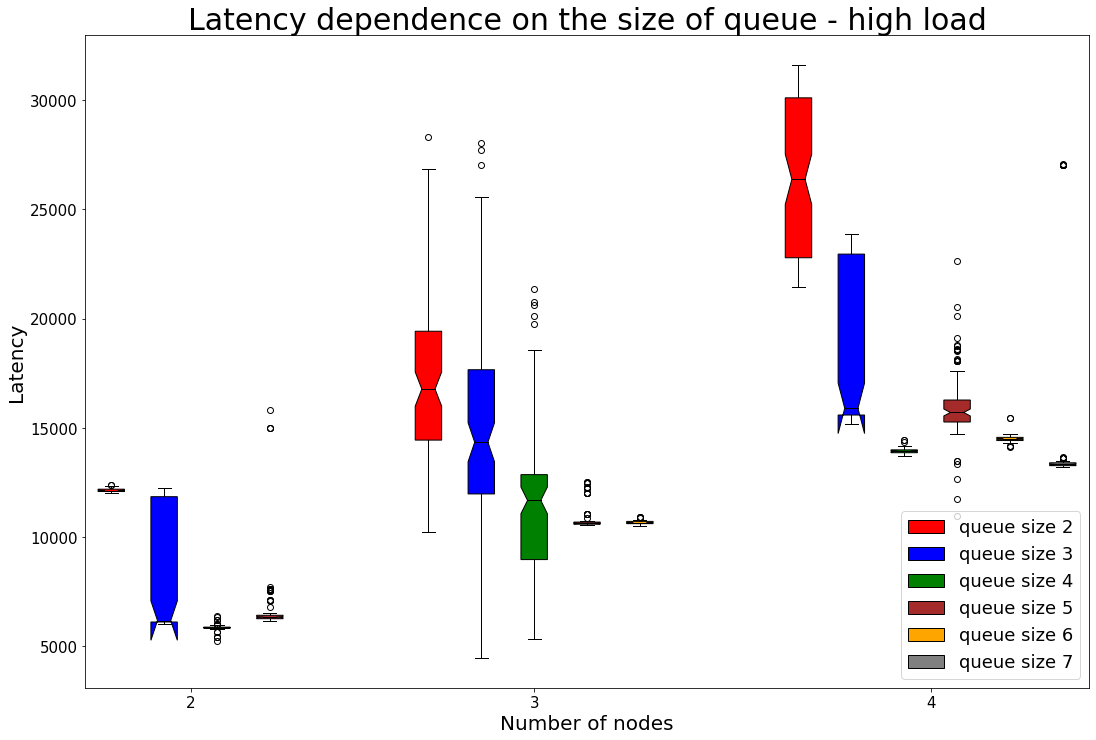

In [ ]:
draw(data_l_eq_pockets, 0.8, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - high load', 'latencyEqPocketsHigh.jpg',
     ['queue size 2', 'queue size 3', 'queue size 4', 'queue size 5', 'queue size 6', 'queue size 7'], 'lower right')

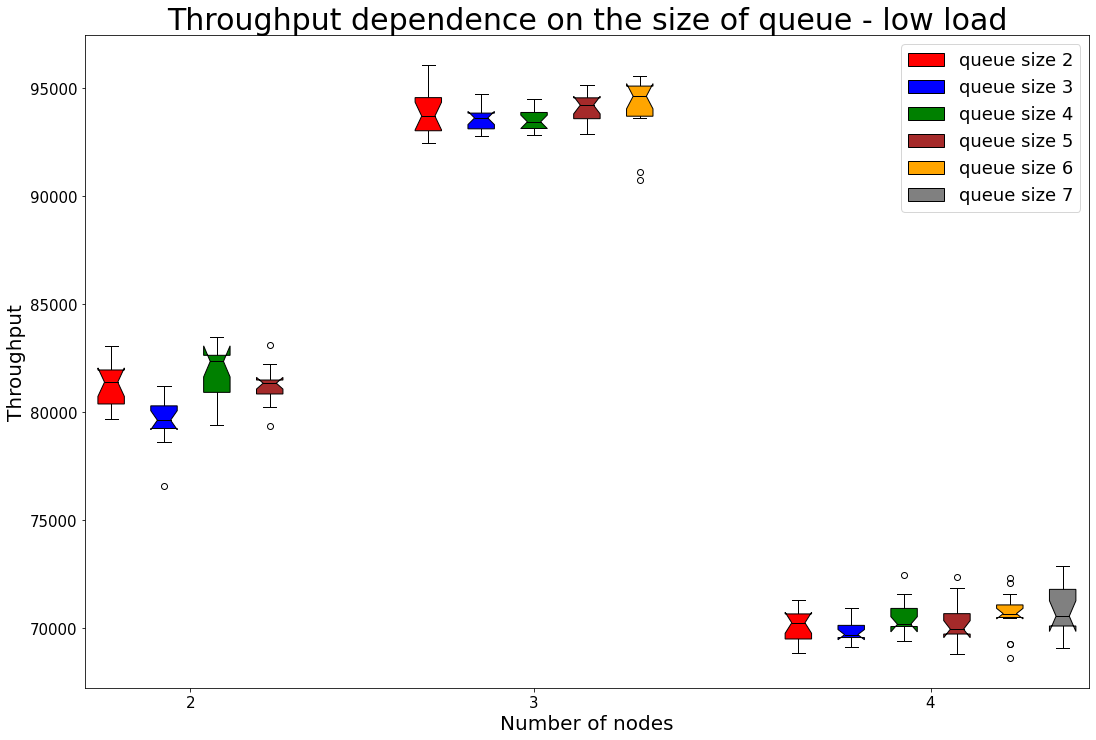

In [ ]:
draw(data_t_eq_pockets, 0.5, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - low load', 'throughputEqPocketsLow.jpg',
     ['queue size 2', 'queue size 3', 'queue size 4', 'queue size 5', 'queue size 6', 'queue size 7'], 'upper right')

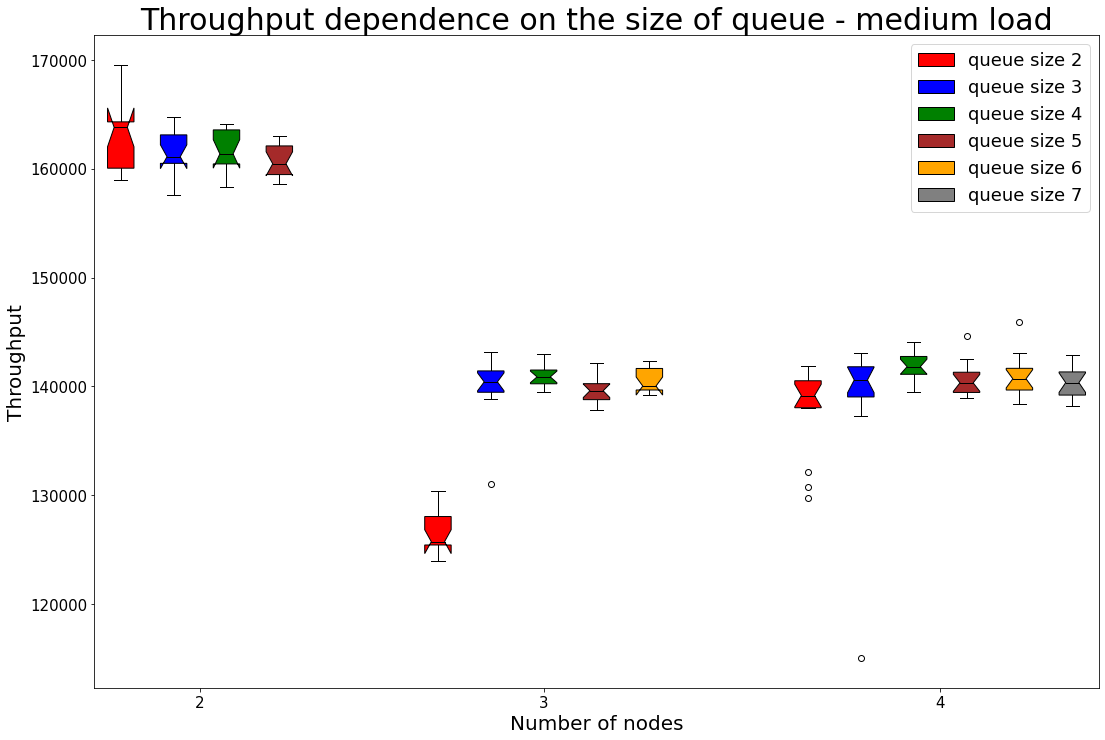

In [ ]:
draw(data_t_eq_pockets, 1, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - medium load', 'throughputEqPocketsMedium.jpg',
     ['queue size 2', 'queue size 3', 'queue size 4', 'queue size 5', 'queue size 6', 'queue size 7'], 'upper right')

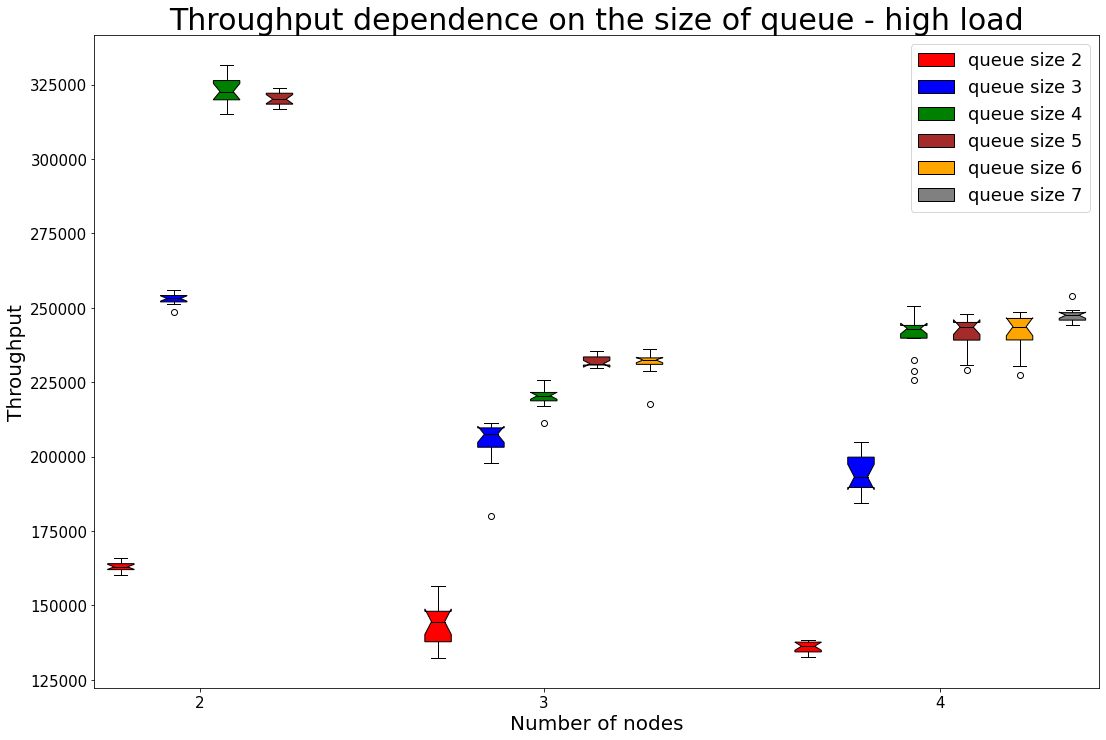

In [ ]:
draw(data_t_eq_pockets, 0.8, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - high load', 'throughputEqPocketsHigh.jpg',
     ['queue size 2', 'queue size 3', 'queue size 4', 'queue size 5', 'queue size 6', 'queue size 7'], 'upper right')

## A

In [ ]:
def get_draw_values(data, queueSize):
  queueSize_data = data[data['queueSize'] == queueSize]
  return queueSize_data['pocketNum'].unique(), queueSize_data.groupby('pocketNum')['value'].mean().values

def draw_plots(data, size, queueSizes, xlabel, ylabel, title, filename):
  fig, ax = plt.subplots()
  for queueSize in queueSizes:
    x, y = get_draw_values(data, queueSize)
    plt.plot(x, y, label = ('queueSize = ' + str(queueSize)))
  plt.legend()
  fig.set_figheight(12)
  fig.set_figwidth(18)

  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel, fontsize = 20)
  plt.tick_params(axis='both', which='major', labelsize=15)
  plt.title(title, fontsize = 30) 
  fig.savefig('/content/drive/MyDrive/Colab Notebooks/MIPT/graphics/' + filename)
  plt.show()

In [ ]:
data_l_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/latencyDepPockets.csv', sep=',', na_values='.')
data_t_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/throughputDepPockets.csv', sep=',', na_values='.')

In [ ]:
size = 4
queueSizesSmall = [4, 8, 12]
queueSizesBig = [4, 8, 12, 20, 28]

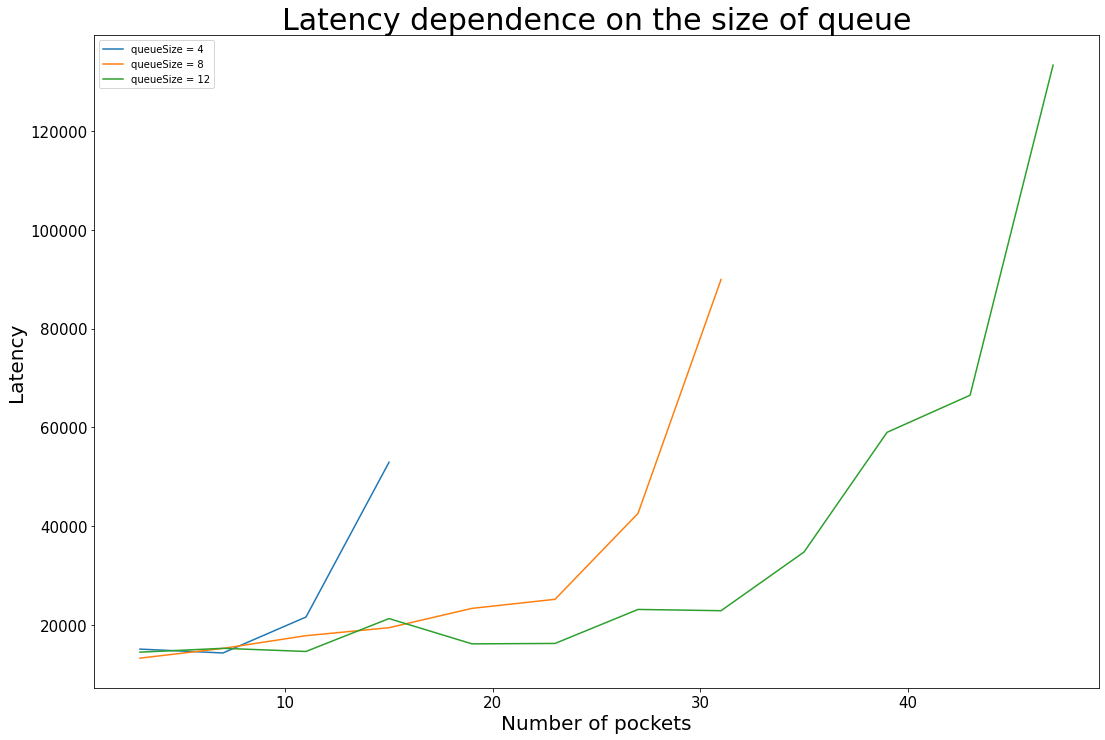

In [ ]:
draw_plots(data_l_dep_pockets, size, queueSizesSmall,'Number of pockets', 'Latency', 'Latency dependence on the size of queue', 'latencyDepPockets.jpg')

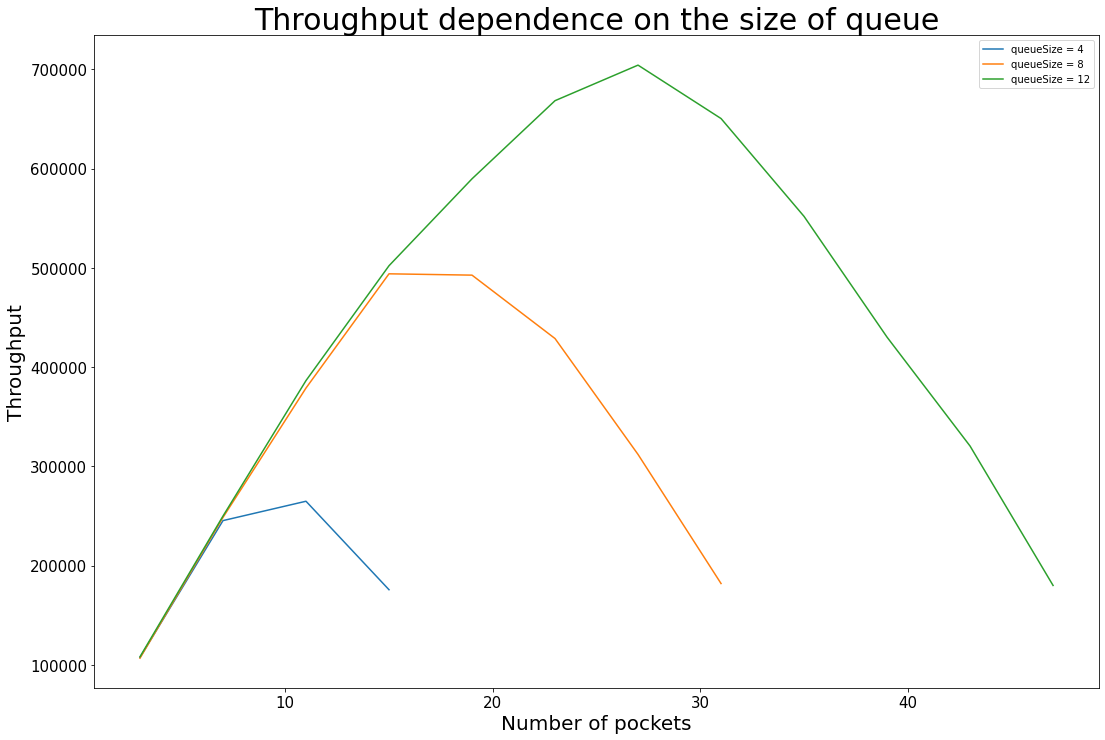

In [ ]:
draw_plots(data_t_dep_pockets, size, queueSizesSmall,'Number of pockets', 'Throughput', 'Throughput dependence on the size of queue', 'throughputDepPockets.jpg')

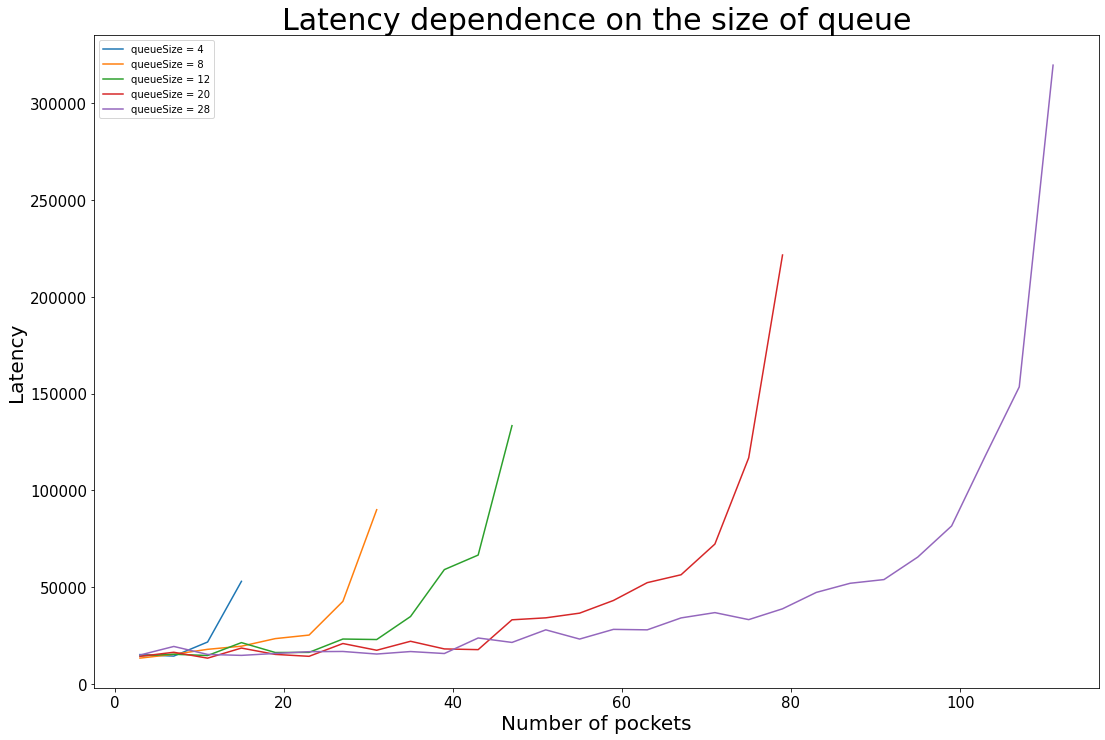

In [ ]:
draw_plots(data_l_dep_pockets, size, queueSizesBig,'Number of pockets', 'Latency', 'Latency dependence on the size of queue', 'latencyDepPocketsBig.jpg')

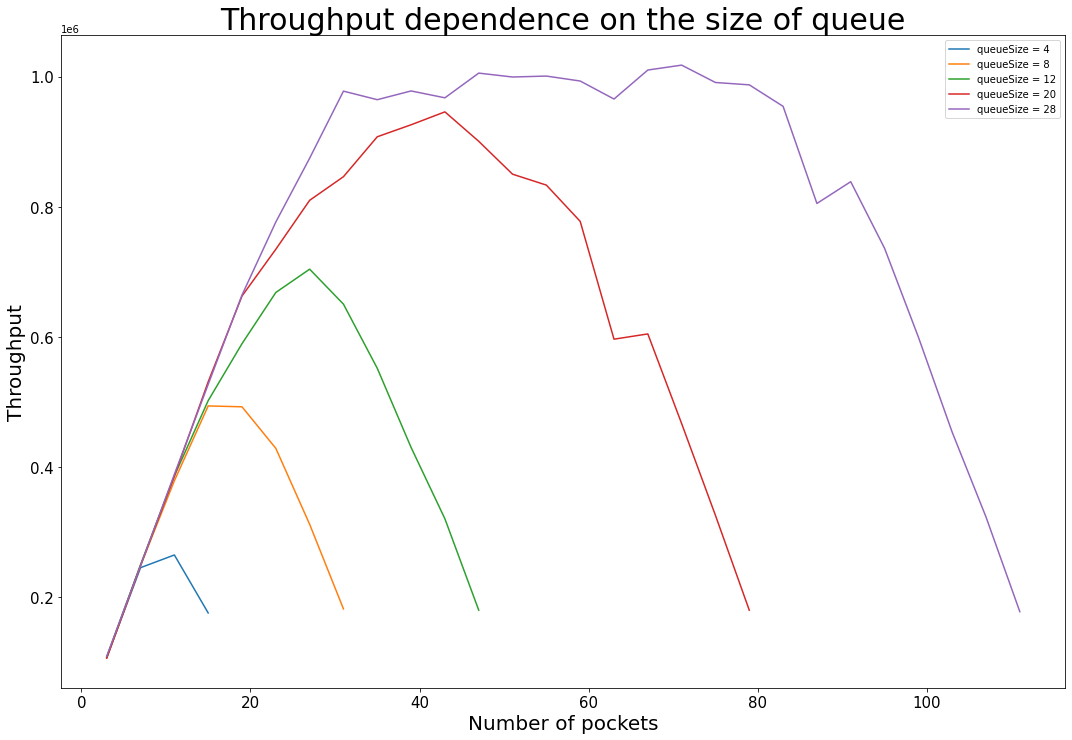

In [ ]:
draw_plots(data_t_dep_pockets, size, queueSizesBig,'Number of pockets', 'Throughput', 'Throughput dependence on the size of queue', 'throughputDepPocketsBig.jpg')

## Остаток

In [ ]:
load_data = data[data['load'] == 0.2]
size_data = load_data[load_data['size'] == 6]
size_data[['load', 'size', 'queueSize', 'pocketNum']].drop_duplicates()

,load,size,queueSize,pocketNum
4300,0.2,6,2,3
4400,0.2,6,3,4
4500,0.2,6,4,5
4600,0.2,6,5,6
4700,0.2,6,6,8
4800,0.2,6,7,9
4900,0.2,6,8,10
